# **BMEN 4470 - Deep Learning for Biomedical Signal Processing Homework 1: Multi-Layer Perceptrons and ARIMA Model for Time Series Forecasting** 
Due 11:59pm on October 4th, 2020


**Problem 1a:** We've discussed in class about the perceptron, or 'artificial neuron', the simplest artifical neural unit of processing that enables machines to learn linear mappings between inputs and outputs, as shown below.  Here, we will implement a Multi-Layer Perceptron (MLP), which enables *non-linear* mappings, and will use it to predict the next number in a sequence.

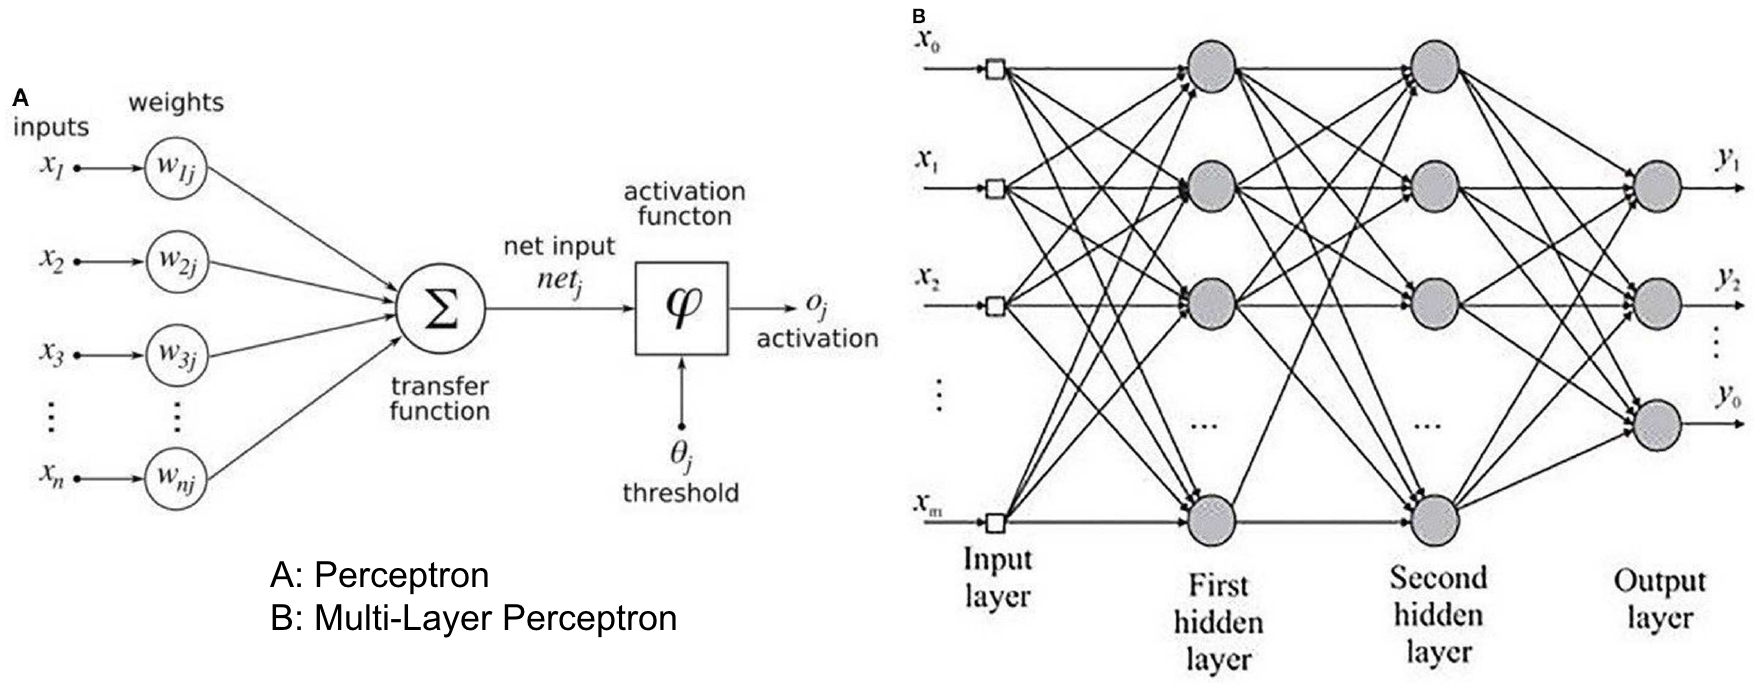

In [1]:
#Imports
import numpy as np

In [2]:
# PREPROCESS DATA for input/output: split a univariate sequence into samples
# 3 inputs --> 1 output
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


**YOUR TASK:** Define a model using Keras Sequential API that correctly predicts the output given a new input sequence of 3 numbers, train your model, plot the model training loss, and demonstrate a sample prediction.  Provide comments to explain each line of your model.  What is the impact on the accuracy of your prediction when you have no hidden layers (perceptron) vs. at least 1 hidden layer (MLP)?

In [4]:
#Some Imports to help you as a start; feel free to add more as needed
from keras.models import Sequential
from keras.layers import Activation, Dense, Input

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations

from tqdm import tqdm

In [5]:
# Your code here: define the model

model = Sequential(
    [
        Input(shape=(n_steps,)),
        Dense(units=128),
        Activation(activations.relu),
        Dense(units=1),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Your code here: train the model via the Keras fit function
model.compile(
    optimizer=Adam(learning_rate=1e-2),
    loss='mse'
    )

history = model.fit(X, y,
                    epochs=300, 
                    verbose = False)

In [7]:
# The second model is the same as the first one,
# but with an Early Stopping Callback

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(
      optimizer=Adam(learning_rate=1e-2),
      loss='mse'
      )

history_es = model.fit(X, y,
                      epochs=300, 
                      verbose = False,
                      callbacks=[callback])

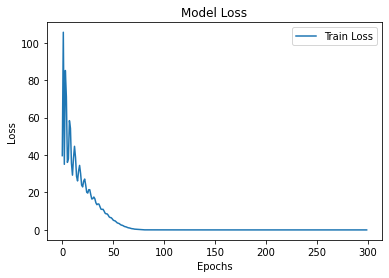

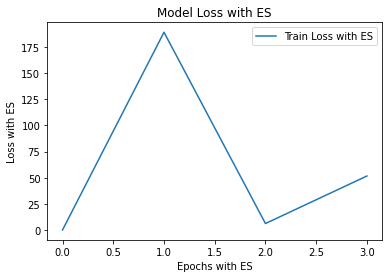

In [29]:
#Plot the training loss using information from the above model training step
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Introducing another plot to show how the graph looks if we introduced
# an early stopping callback during the training

loss_es = history_es.history['loss']

plt.plot(history_es.history['loss'], label='Train Loss with ES')

plt.title('Model Loss with ES')
plt.ylabel('Loss with ES')
plt.xlabel('Epochs with ES')
plt.legend(loc='upper right')
plt.show()

In [31]:
# Your code here: Demonstrate Prediction using model.predict
x_input = np.array([70, 80, 90]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))

# With Early Stopping
print(model.predict(x_input))

[[84.60964]]


In [33]:
# Without Early stopping
print(model.predict(x_input))

[[100.0739]]


In [40]:
# Here we'll analyze the model deeper by adjusting the number of
# Dense layer perceptrons that we can put into the model

dense_layer_neurons_list = [16*i for i in range (2, 48)]
print(dense_layer_neurons_list)

x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))

# Defining a dictionary to keep the predictions
prediction_results_dict = {}

for dense_layer_neurons in tqdm(dense_layer_neurons_list):
  # Iterating 5 times to get the average so we can be sure that we're not
  # getting a random value
  current_predict_vals = []
  for i in range(5):
    model = Sequential(
      [
          Input(shape=(n_steps,)),
          Dense(units=dense_layer_neurons),
          Activation(activations.relu),
          Dense(units=1),
      ]
    )

    model.compile(
      optimizer=Adam(learning_rate=1e-2),
      loss='mse'
      )

    history = model.fit(X, y,
                      epochs=300, 
                      verbose = False)
    current_predict_vals.append(model.predict(x_input)[0][0])
    
  prediction_results_dict[str(dense_layer_neurons)] = sum(current_predict_vals) / 5.0

print(prediction_results_dict)

[32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384, 400, 416, 432, 448, 464, 480, 496, 512, 528, 544, 560, 576, 592, 608, 624, 640, 656, 672, 688, 704, 720, 736, 752]


  0%|          | 0/46 [00:00<?, ?it/s]

100%|██████████| 46/46 [04:38<00:00,  6.05s/it]

{'32': 103.48425598144532, '48': 102.09830322265626, '64': 101.25092010498047, '80': 101.16340484619141, '96': 101.44263610839843, '112': 101.09632568359375, '128': 100.71358489990234, '144': 100.78414154052734, '160': 100.9234375, '176': 100.9532485961914, '192': 100.6859146118164, '208': 100.76367797851563, '224': 100.51439056396484, '240': 100.62836303710938, '256': 100.41256408691406, '272': 100.45161743164063, '288': 100.44347076416015, '304': 100.35116271972656, '320': 100.38233184814453, '336': 100.51809997558594, '352': 100.51999053955078, '368': 100.30067749023438, '384': 100.35446624755859, '400': 100.34468994140624, '416': 100.3249298095703, '432': 100.2820541381836, '448': 100.25462646484375, '464': 100.34015045166015, '480': 100.39429626464843, '496': 100.31438598632812, '512': 100.23073883056641, '528': 100.23018341064453, '544': 100.28709259033204, '560': 100.34695129394531, '576': 100.22578582763671, '592': 100.2752670288086, '608': 100.31511535644532, '624': 100.343626

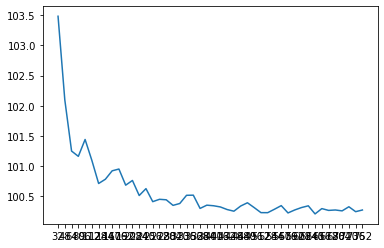

640 100.20955505371094


In [51]:
x, y = zip(*prediction_results_dict.items())
plt.plot(x, y)
plt.show()

# Calculating the closest value to 100 by ordering the values (i.e. item[1]) in
# ascending order and getting the first one by making the dictionary 
# an iterable object and iterating over it once by calling its 'next' method
min_vals = next(iter({k: v for k, v in sorted(prediction_results_dict.items(), key=lambda item: item[1])}.keys()))
print(min_vals, prediction_results_dict[min_vals])

_____________________________________________________________________________
Here we can see that the best approximation we get at 640 epoxhs and the general trend is downwards until 336 epochs and then the graph becomes to almost oscillate with only just a tiny bit of a trend to go down towards 100. However, we can almost safely assume that after the graph reaches 800+ epochs the neural network starts to overfit.
_____________________________________________________________________________

**Problem 1b:** What happens when you try to predict the next number for the following test sequence: 1^2, 2^2, 3^2? Does the model you developed in Part 1a work here?  Explain.

In [9]:
# Your code here: Demonstrate Prediction using model.predict
x_input = np.array([1, 4, 9]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))

print(model.predict(x_input))

[[13.999823]]


# Explaination

The model was unable to predict the expected value - 16 - because
the initial training has most likely produced a function that 
behave linear-like and here we need a quadratic function 

Having said this, the 'new function' we are seeking requires us
to either evaluate the next number by using (n+1)^2 where n^2 is
the last number in the sequence, or by using 1 + 3 + 5 + 7 + ... + (2n+1) which is essentially the same thing since there is a quadratic representation
of this sum which we can obtain if we start grouping every i-th number with every (m-i+1)-th number where m is the total number of sequence members.

The prediction that we got from the model, 13.9998, is actually a good prediction for the training set that we introduced our model to. This is because, we can see that if we analyze the difference between each of the sequence members. 


1.    |4 - 1| = 3
2.    |9 - 4| = 5
3.   |16 - 9| = 7

If we are trying to get a linearized function that connects the first two numbers to a third one, we would most likely expect the third number to be some kind of a mean of the first two (either arithmetic mean, geometric mean, quadratic/cubic mean, or maybe even harmonic mean). Given the fact that the answer we got is 13.9998 and the cubic mean (which we know is one of the biggest means) is approx. 4.2358, we can argue that our model is actually predicting as good as we expect it to do since we see that there is still a significant offset - by approx. |13.9998 - (9 + 4.2358)| = 0.764 > 3/4. This tells us that the model has recognized the introduced irregularity (the fact that the differences between the 1st and 2nd number and the 2nd and third number are not the same) and tried to adjust to it.

**Problem 2a:** Repeat Problem #1, but this time train your model to predict the next number in the sequence of squares (n^2, where n = 1, 2, 3, ...).  Also, this time use Keras Functional API to build your model.

In [10]:
# Define input sequence
raw_seq = [1, 4, 9, 16, 25, 36, 49, 64, 81]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[1 4 9] 16
[ 4  9 16] 25
[ 9 16 25] 36
[16 25 36] 49
[25 36 49] 64
[36 49 64] 81


In [11]:
#Some Imports to help you as a start; feel free to add more as needed
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers, Input, Model

In [14]:
# Your code here: define the model

input_layer = Input(shape=(n_steps,))
dense_layer = Dense(units=128, activation='relu')(input_layer)
output_layer = Dense(units=1)(dense_layer)

model_squares = Model(inputs=input_layer,
                       outputs=output_layer)

model_squares.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 128)               512       
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Your code here: train the model via the Keras fit function
model_squares.compile(
      optimizer=Adam(learning_rate=1e-2),
      loss='mse'
      )

# Trying the model with 640 epochs - the best epoch val we got for our last model
history_squares = model_squares.fit(X, y,
                                    epochs=640, 
                                    verbose=False)

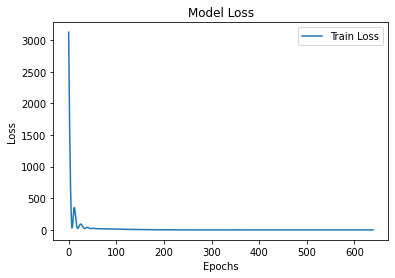

In [16]:
#Plot the training loss using information from the above model training step
import matplotlib.pyplot as plt

loss = history_squares.history['loss']

plt.plot(history_squares.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

In [17]:
# Your code here: Demonstrate Prediction using model.predict; feel free to show
# additional examples than the one already provided here
x_input = np.array([49, 64, 81]) # predict the ooutput for this input
x_input = x_input.reshape((1, n_steps))

print(model_squares.predict(x_input))

[[101.22513]]


_____________________________________________________________________________
Since we're expecting a value of a 100 and we got 101.22513, we can safely assume that this value is close enough since the error is of order 10^(-2) which is negligible for a neural network of the most basic kind (MLP), which has only one deep layer with more than 1 perceptron.
_____________________________________________________________________________

However, let's do a couple of more predictions so we can see how the model performs in different cases:
_____________________________________________________________________________

In [28]:
predictions_dict = {}

# Another one whole number test case
x_input = np.array([64, 81, 100]) 
x_input = x_input.reshape((1, n_steps))

predictions_dict['whole-number'] = model_squares.predict(x_input)

# A rational number test case
x_input = np.array([1.5**2, 2.5**2, 3.5**2]) 
x_input = x_input.reshape((1, n_steps))

predictions_dict['rational-number'] = model_squares.predict(x_input)

# Real number test case
x_input = np.array([
    (2**(1/4))**2,
    (2**(1/4) + 1)**2,
    (2**(1/4) + 2)**2
  ])
x_input = x_input.reshape((1, n_steps))
predictions_dict['real-number'] = model_squares.predict(x_input)

expected_results = [
    121,              # the expected whole number result
    4.5**2,           # the expected rational number result
    (2**(1/4) + 3)**2 # the expected real number result 
]

for i, (key, value) in enumerate(predictions_dict.items()):
  print(f'Predicted val: {key} -> {value}')
  print(f'Expected val: {expected_results[i]}\n')

Predicted val: whole-number -> [[123.75958]]
Expected val: 121

Predicted val: rational-number -> [[20.366497]]
Expected val: 20.25

Predicted val: real-number -> [[17.744862]]
Expected val: 17.54945625238942



_____________________________________________________________________________
If we analyze the results above, we can see that our model handles every case very well since we have not provided it with training data for the second and third case we evaluated and the predictions are still very close to the expected value.

If we calculate the error:
  1. 123.75958 / 121 = 1.022806; |1.022806 - 1| = 0.022806 = 2.2806 %
  2. 20.366497 / 20.25 = 1.005753; |1.005753 - 1| = 0.005753 = 0.5753 %
  3. 17.744862 / 17.54945625238942 = 1.011135; |1.011135 - 1| = 0.011135 = 1.1135 %

we can see that the error of the 'edge cases' is even lower than the case we would normally expect to train our model for. This means that the model is not overfitted and the error is below 2.5% which is very much acceptable.
_____________________________________________________________________________

**Problem 2b:** How many perceptrons (neurons) are there in the Multi-Layer Perceptron (MLP) model you defined in the problem 2a? How many weights? And how many learnable parameters? Please show your calculation and explain briefly.

The model we used to predict the sequences in the previous 2 tasks included the following 3 layers: 

  1. An input layer with **3 perceptrons** 
  2. A dense layer with **128 perceptrons**
  3. An output dense layer with **1 perceptron**

(The ReLu activation has no perceptrons since it's basically only a function)

=> The total number of perceptrons is: **3 + 128 + 1 = 132 perceptrons**

Now, the total number of parameters are:
  1. Graph edges between first 2 layers: Input_layer x Dense_layer_1 = 3 x 128 = 384
  2. Graph edges between second 2 layers: Dense_layer_1 x Dense_layer_2 = 128 x 1 = 128
  3. Biases for first dense layer: 128
  4. Biases for second dense layer: 1

=> The total number of learnable parameters is: **384 + 128 + 128 + 1 = 641** 

The answer we got is the same as the automatically calculated number at the end of the models' summaries. 


**Problem 3:** Now we will analyze the Medical Expenditures Dataset (dataSheet2.csv). [Refer to https://www.frontiersin.org/articles/10.3389/fdata.2020.00004/full for more details on dataset and problem.]  This dataset contains average daily expenditures on a medicine.  We will break up this dataset into train and test sets and design a Multi-Layer Perceptron to forecast average daily medical expenditures for a future time-step after training on a number of time-steps from the past.

In [6]:
#MOUNTING GOOGLE DRIVE WHERE DATA IS STORED
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [7]:
#GET THE DATA (Remember to change the path to the location of your saved file!)
import pandas as pd
data = pd.read_csv("/gdrive/MyDrive/BMEN_4470_Fall_2021/HW1/dataSheet2.csv")
data.head()

,Date,Average Daily Expenditure on Medicine B in Dollars
0,1/2/2011,114.874671
1,1/3/2011,112.041149
2,1/4/2011,167.311618
3,1/5/2011,241.058332
4,1/6/2011,124.520457


In [8]:
import numpy as np
#JUST GET THE MEDICINE EXPENDITURE VALUES
data1 = data["Average Daily Expenditure on Medicine B in Dollars"]
data1Arr = np.array(data1)
print(data1.shape)
print(data1Arr.shape)

(1565,)
(1565,)


In [9]:
#DIFFERENT WAY OF SPLITTING DATA INTO INPUT/OUTPUT SEQUENCES
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d])
  Y.append(data_arr[d])
 return np.array(X), np.array(Y)

In [10]:
#Split data set into testing dataset and train dataset
train_size = int(len(data1Arr) * 0.8) #80% training, 20% testing
train = data1Arr[0:train_size]
test = data1Arr[train_size:len(data1Arr)]
print(train.shape)
print(test.shape)
# setup look_back window 
look_back = 7
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

#Print a few of the samples to check format
for i in range(5):
  print(trainX[i], trainY[i])

(1252,)
(313,)
[114.8746706 112.0411489 167.3116175 241.0583317 124.5204571 113.8333722
 149.2555453] 159.0992442
[112.0411489 167.3116175 241.0583317 124.5204571 113.8333722 149.2555453
 159.0992442] 187.9188007
[167.3116175 241.0583317 124.5204571 113.8333722 149.2555453 159.0992442
 187.9188007] 138.774122
[241.0583317 124.5204571 113.8333722 149.2555453 159.0992442 187.9188007
 138.774122 ] 176.4914938
[124.5204571 113.8333722 149.2555453 159.0992442 187.9188007 138.774122
 176.4914938] 165.71289480000002


**YOUR TASK:** Design an MLP taking into account what you have learned from Problems #1 and #2 that achieves as low RMSE (Root Mean Square Error) as possible.  Consider the impact of number of look-back time-steps.  Experiment with and comment on results of changing 3 of the following parameters, providing reasons for your observations.

1.   Number of hidden layers
2.   Number of neurons per layer
3.   Activation Function
4.   Number of epochs
5.   Batch size
6.   Optimizer/Learning Rate

You will be graded on your analysis of these factors, not on the accuracy (RMSE) you achieve.  Show plots of training/test loss for your 3 chosen experiments and a plot of actual vs. prediction for your best model.  Does the same MLP that you designed for Problems #1 and #2 work well for Problem #3?

In [11]:
# Imports
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from tqdm import tqdm

In [14]:
# YOUR CODE HERE: define model & train model

# Since we're restricted to only using Dense layers since we're creating an MLP
# we will create a for loop which will change different hyperparameters 
# every time it iterates and we will evaluate the RMSE every time so we can
# find out which models perform better, which models perform worse and try to
# find a trend that explains the results we get

# Defining dictionaries where we'll keep the histories & trained models
# so we can plot them afterwards

histories_dict = {}
models_dict = {}

# Defining the possible hyperparameters -> the number of layers and 
# the number of epochs for the model
number_of_layers = [2, 3, 4, 5]
number_of_epochs = [300, 400, 500]

for num_of_layers in tqdm(number_of_layers):
  # Defining the number of neurons per layer
  neurons_per_layer = [2**i for i in range(5, 5+num_of_layers)]

  # Defining the model by giving it an Input layer,
  # several dense layers, and a final 1-perceptron dense layer
  model = keras.Sequential(name=f'{num_of_layers}-layers-model')
  model.add(keras.Input(shape=(look_back,))) 
  [model.add(layers.Dense(num_neurons, activation="relu")) for num_neurons in neurons_per_layer]
  model.add(layers.Dense(1))

  model.compile(loss='mse',
                optimizer="adam")

  for num_of_epochs in number_of_epochs:
    dict_key = f'{num_of_layers}-layers-{num_of_epochs}-epochs-model'
    histories_dict[dict_key]=model.fit(trainX, trainY,
                                       epochs=num_of_epochs, 
                                       verbose=False,
                                       validation_data=(testX,
                                                        testY))
    models_dict[f'{num_of_layers}-layers-{num_of_epochs}-epochs-model'] = model


# Now let's recreate the same neural network but with tanh as the first
# activation function as opposed to just the normal ReLu function

for num_of_layers in tqdm(number_of_layers):
  neurons_per_layer = [2**i for i in range(6, 5+num_of_layers)]

  model = keras.Sequential(name=f'{num_of_layers}-layers-model')
  model.add(keras.Input(shape=(look_back,)))
  # Adding the tanh layer
  model.add(layers.Dense(2**5, activation="tanh"))
  # And continuing to build the model the same way it was previously built
  [model.add(layers.Dense(num_neurons, activation="relu")) for num_neurons in neurons_per_layer]
  model.add(layers.Dense(1))

  model.compile(loss='mse',
                optimizer="adam")

  for num_of_epochs in number_of_epochs:
    dict_key = f'tanh-{num_of_layers}-layers-{num_of_epochs}-epochs-model'
    histories_dict[dict_key] = model.fit(trainX, trainY,
                                         epochs=num_of_epochs, 
                                         verbose=False,
                                         validation_data=(testX,
                                                          testY))
    models_dict[dict_key] = model

# Lastly let's add the model we used for tasks 1 and 2 but with different 
# learning rates for the optimizer

# 1) The same model as for tasks 1 and 2
model = Sequential(
    [
        Input(shape=(look_back,)),
        Dense(units=128),
        Activation(activations.relu),
        Dense(units=1),
    ]
)

model.compile(
    optimizer=Adam(learning_rate=1e-2),
    loss='mse'
    )

history = model.fit(trainX, trainY,
                    epochs=300, 
                    verbose=False,
                    validation_data=(testX,
                                     testY))

histories_dict['previous-model-10**(-2)'] = history
models_dict['previous-model-10**(-2)'] = model

# 2) The same model as for tasks 1 and 2 but with a different learning rate
model = Sequential(
    [
        Input(shape=(look_back,)),
        Dense(units=128),
        Activation(activations.relu),
        Dense(units=1),
    ]
)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='mse'
    )

history = model.fit(trainX, trainY,
                    epochs=300, 
                    verbose=False,
                    validation_data=(testX,
                                     testY))

histories_dict['previous-model-10**(-4)'] = history
models_dict['previous-model-10**(-4)'] = model

100%|██████████| 4/4 [10:05<00:00, 151.37s/it]


In [15]:
# Let's see what we have in our history dictionary finally
[print(key) for key in histories_dict.items()]

('2-layers-300-epochs-model', <keras.callbacks.History object at 0x7f20e230d3d0>)
('2-layers-400-epochs-model', <keras.callbacks.History object at 0x7f20e65f0e10>)
('2-layers-500-epochs-model', <keras.callbacks.History object at 0x7f20e61a6cd0>)
('3-layers-300-epochs-model', <keras.callbacks.History object at 0x7f20e6460a50>)
('3-layers-400-epochs-model', <keras.callbacks.History object at 0x7f20e67f5a10>)
('3-layers-500-epochs-model', <keras.callbacks.History object at 0x7f20e6817cd0>)
('4-layers-300-epochs-model', <keras.callbacks.History object at 0x7f20e67dce50>)
('4-layers-400-epochs-model', <keras.callbacks.History object at 0x7f20e62eccd0>)
('4-layers-500-epochs-model', <keras.callbacks.History object at 0x7f20e68bbad0>)
('5-layers-300-epochs-model', <keras.callbacks.History object at 0x7f20e6876850>)
('5-layers-400-epochs-model', <keras.callbacks.History object at 0x7f20e6535510>)
('5-layers-500-epochs-model', <keras.callbacks.History object at 0x7f20e292d910>)
('tanh-2-layers-

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

History for: 2-layers-300-epochs-model


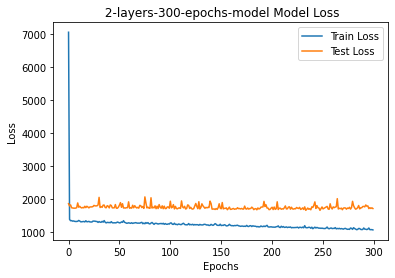

History for: 2-layers-400-epochs-model


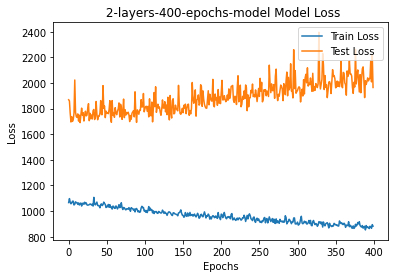

History for: 2-layers-500-epochs-model


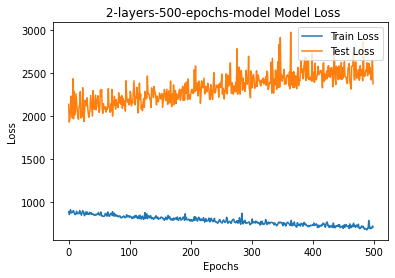

History for: 3-layers-300-epochs-model


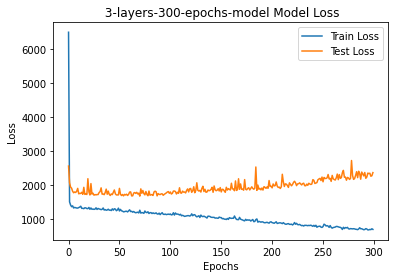

History for: 3-layers-400-epochs-model


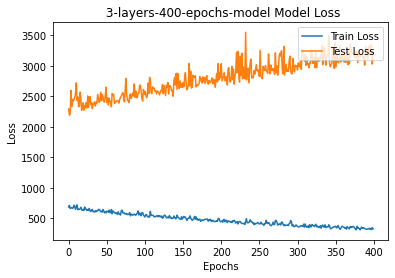

History for: 3-layers-500-epochs-model


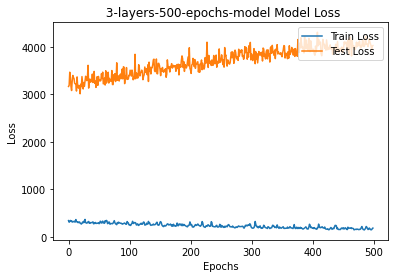

History for: 4-layers-300-epochs-model


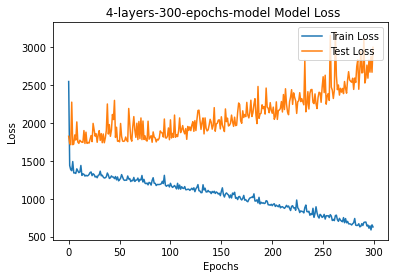

History for: 4-layers-400-epochs-model


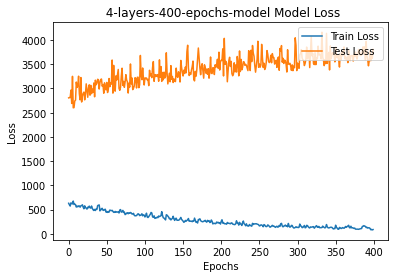

History for: 4-layers-500-epochs-model


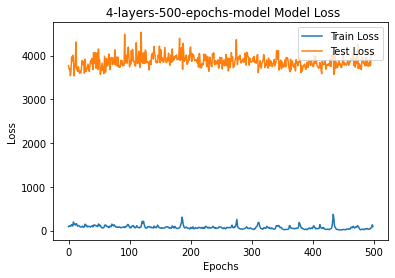

History for: 5-layers-300-epochs-model


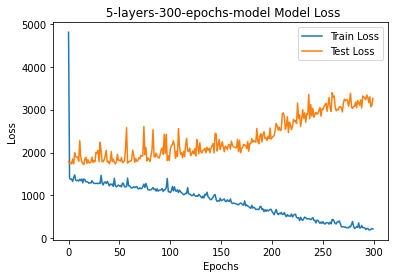

History for: 5-layers-400-epochs-model


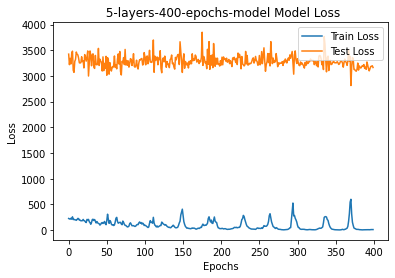

History for: 5-layers-500-epochs-model


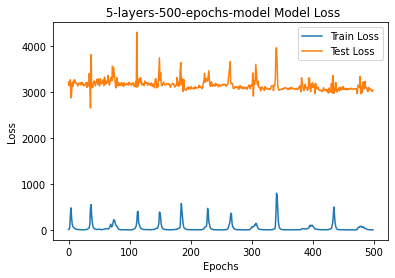

History for: previous-model-10**(-2)


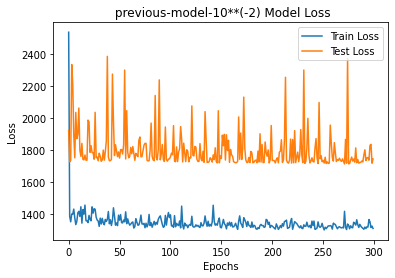

History for: previous-model-10**(-4)


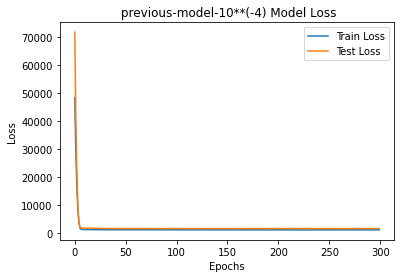

History for: tanh-2-layers-300-epochs-model


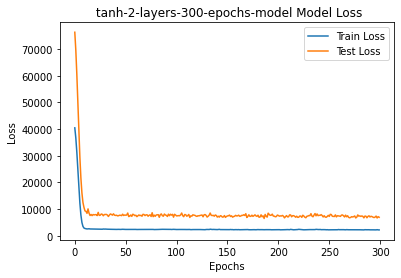

History for: tanh-2-layers-400-epochs-model


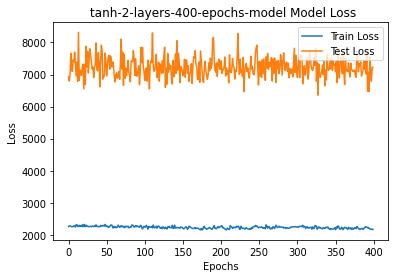

History for: tanh-2-layers-500-epochs-model


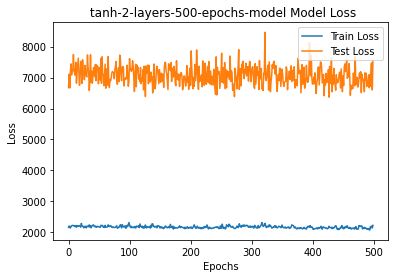

History for: tanh-3-layers-300-epochs-model


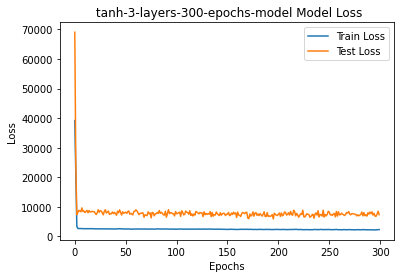

History for: tanh-3-layers-400-epochs-model


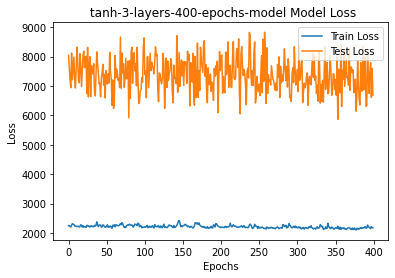

History for: tanh-3-layers-500-epochs-model


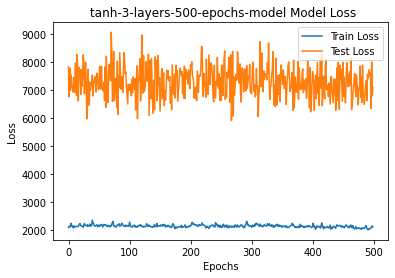

History for: tanh-4-layers-300-epochs-model


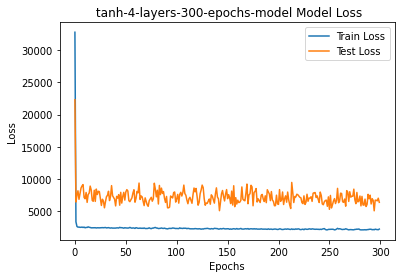

History for: tanh-4-layers-400-epochs-model


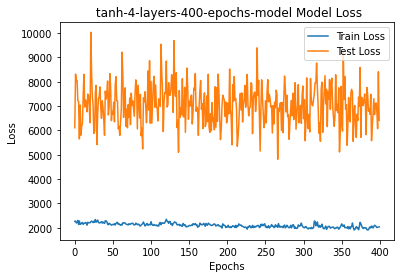

History for: tanh-4-layers-500-epochs-model


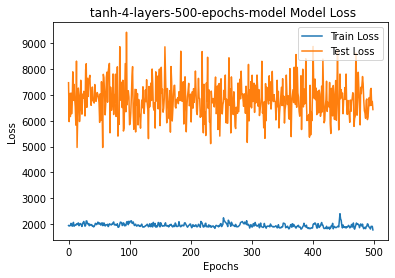

History for: tanh-5-layers-300-epochs-model


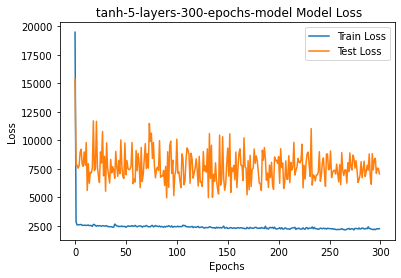

History for: tanh-5-layers-400-epochs-model


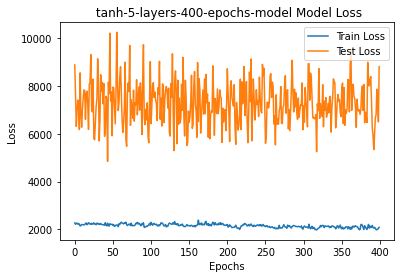

History for: tanh-5-layers-500-epochs-model


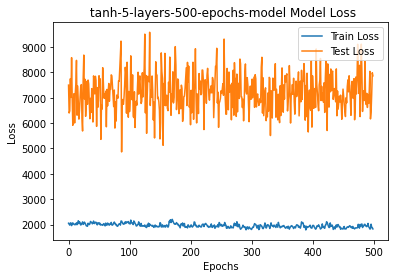

In [16]:
#PLOT THE TRAINING LOSS
import matplotlib.pyplot as plt

for history_key in sorted(histories_dict.keys()):

  print(f'History for: {history_key}')
  history = histories_dict[history_key]

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Test Loss')
  plt.title(f' {history_key} Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(loc='upper right')
  plt.show();

In [23]:
#MODEL EVALUATION via RMSE

# Now we'll iterate over the all the models and we will sort them by average
# RMSE from their train and test score

# Defining a dict where we'll keep the RMSE for each model
rmse_dict = {}

for model_key in sorted(models_dict.keys()):
  model = models_dict[model_key]

  train_score = model.evaluate(trainX, trainY, verbose=0)
  test_score = model.evaluate(testX, testY, verbose=0)

  rmse_dict[model_key] = {
      'train_score': train_score,
      'test_score': test_score
  }

# Sorting the dictionary and printing out the results
for key, value in sorted(rmse_dict.items(), 
                         key=lambda item: item[1]['train_score'] + item[1]['test_score']):
  print(f'Model evaluation for: {key}')

  train_score = value['train_score']
  test_score = value['test_score']

  print(f'Train Root Mean Squared Error(RMSE): {train_score}')
  print(f'Test Root Mean Squared Error(RMSE): {test_score}')
  # Empty line for readibility
  print()

Model evaluation for: previous-model-10**(-4)
Train Root Mean Squared Error(RMSE): 1273.2655029296875
Test Root Mean Squared Error(RMSE): 1765.3128662109375

Model evaluation for: previous-model-10**(-2)
Train Root Mean Squared Error(RMSE): 1295.4459228515625
Test Root Mean Squared Error(RMSE): 1743.6884765625

Model evaluation for: 2-layers-300-epochs-model
Train Root Mean Squared Error(RMSE): 666.8027954101562
Test Root Mean Squared Error(RMSE): 2373.751220703125

Model evaluation for: 2-layers-400-epochs-model
Train Root Mean Squared Error(RMSE): 666.8027954101562
Test Root Mean Squared Error(RMSE): 2373.751220703125

Model evaluation for: 2-layers-500-epochs-model
Train Root Mean Squared Error(RMSE): 666.8027954101562
Test Root Mean Squared Error(RMSE): 2373.751220703125

Model evaluation for: 5-layers-300-epochs-model
Train Root Mean Squared Error(RMSE): 3.1787734031677246
Test Root Mean Squared Error(RMSE): 3042.456787109375

Model evaluation for: 5-layers-400-epochs-model
Train 

_____________________________________________________________________________
As we can see, there actually is a general trend which we can identify.

All the models can be distinguished into 3 groups:

    > a) The 2 models which resemble the model from task 1 and 2
    
    > b) The models which have only ReLu activation functions

    > c) The models which have a Tanh activation function as their first activation


There is a clear trend that the **a)** models are doing significantly better than the **b)** and **c)** models. Since simple calculations can easily show that the **a)** models have much less trainable parameters than the other models, we can safely assume that the results are probably because of overfitting. If we look at the dataset, it consists of the simplest possible data architecture -> i.e. a single value input and a single value output. This would make the model more inclined towards overfitting since after a significant amount of epichs, it can just memorize the inputs and outputs as opposed to properly predicting new data.

This theory can be further confirmed by looking at the loss graphs for the models. We can recognise that from group **b)** there is only one model (2 layers, 300 epochs, i.e. the simplest one) for which the loss function does not start to diverge greatly. For all other models from that group we can clearly see the difference in train and test loss values rises, meaning that the model, indeed, overfits. As opposed to the **b)** models, the trend in the **c)** models is such that the average difference in loss values stays the same, but it’s in the range [5000; 9000], which is far worse. This means that the tanh activation function makes the prediction less accurate. This is probably connected to the previous reason - i.e. the overfitting. This assumption is plausible because of the nature of the 2 opposing activation functions. The ReLu function “loses” more information because it sets values to 0. The tanh function:

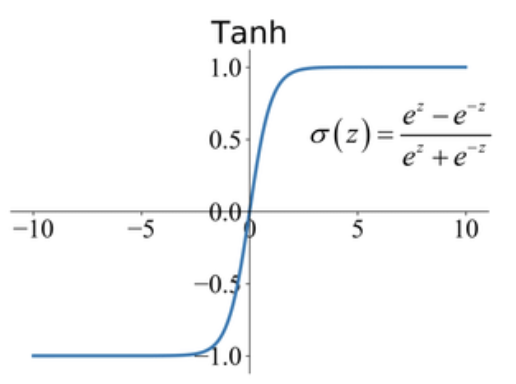

does not nullify any weights (expect in the rare case sigma=0) meaning that it forwards information that will have been set to 0 if the activation was a ReLu. In our case, that "helps the overfitting" since the model is already overfitted and by providing it with even more parameters to work with, it becomes even worse. This can be seen also by the training time, which is (as expected) more for the **c)** models, because the training needs more time to account for the more non-nullified parameters.

In conclusion, both the graphs and our analysis show that the **a)** models are the best.
_____________________________________________________________________________

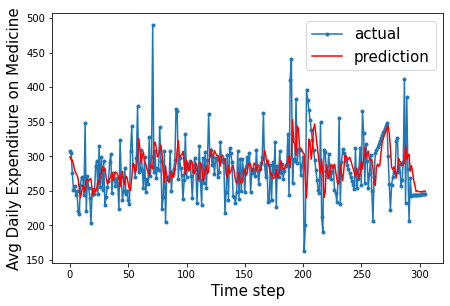

In [24]:
# Demonstrate Prediction and Create Plot to Compare Prediction to Actual
short = 313 #how much of the test sequence to plot (currently: all of it)

# Choosing the best model accoring to our previous output
model = models_dict['previous-model-10**(-4)']
test_predict = model.predict(testX)

def prediction_plot(testY, test_predict):
  len_prediction=[x for x in range(len(testY[:short]))]
  plt.plot(len_prediction, testY[:short], marker='.', label="actual")
  plt.plot(len_prediction, test_predict[:short], 'r', label="prediction")
  plt.tight_layout()
  plt.subplots_adjust(left=0.07)
  plt.ylabel('Avg Daily Expenditure on Medicine', size=15)
  plt.xlabel('Time step', size=15)
  plt.legend(fontsize=15)
  plt.show();

prediction_plot(testY, test_predict)

**Problem 4:** Now let's repeat Problem #3 using a non-DL model for comparison.  Use an ARIMA Model for time-series forecasting on the medicine expenditures dataset.  Your task is to experiment with the lag order (p), degree of differencing (d), and order of the moving average (q).  Discuss the impact of these factors on your final prediction error.  How does this model compare with your MLP model from Problem #3?  Which one is better?  Why?  Why are they both still not "good enough"?

In [36]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#ARIMA model training and prediction (NOTE: training may take ~10min)
history = [x for x in train]
p, d, q = 2, 1, 2

predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(p, d, q)) # <--- YOUR TASK HERE: modify p, d, q
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: Converge

Test MSE: 1600.893


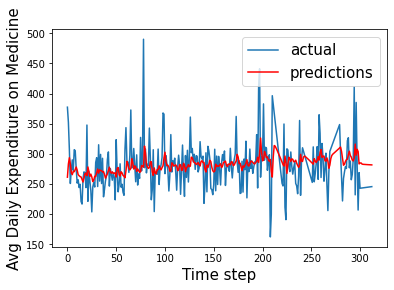

In [37]:
from matplotlib import pyplot
# plotting actual vs. ARIMA prediction
pyplot.plot(test, label='actual')
pyplot.plot(predictions, color='red', label='predictions')
pyplot.ylabel('Avg Daily Expenditure on Medicine', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

By trying out different parameters for p, q, and d the values 2, 1, and 2 respectibely seem to give us the best possible combination of results. By running several different examples we can easily see that obtaining an MSE value below 1200 is impossible. However, comparing that to our Test Root Mean Squared Error (RMSE) results from Problem 3, we can see that this is actually a better prediction by a factor of approx. 1.125 (or 12.5%). Having said that, we can see that both models do not predict the expected values well and, instead, output some value which is only up to a standard deviation away from the middle value. Because of this, both models are "not good enough".

P.S. Visually, we can argue that the model from Problem 3 is better since it is not so fixed around the middle value.

**WHAT TO SUBMIT:** Please download and submit (1) this jupyter notebook (.ipynb file) with your code and comment additions as well as (2) a pdf summarizing your analysis of results (plots/explanations) for each problem on courseworks by **October 4th, 2020 at 11:59pm**.